# **CS4082 - Machine Learning**
## Lab 2: Machine Learning with Scikit-Learn Basics

### **Instructor**: Dr. Naila Marir


---


### **Student Name:** Judy Abuquta
### **Student ID:** S22107883

# Part 1: Setting Up Your Environment

In [1]:
import pandas as pd
import numpy as np

import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')

scikit-learn version: 1.6.1
All libraries loaded successfully!


# Part 2: Loading and Exploring Data

In [2]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Features (X) and Labels (y)
X = iris.data # Shape: (150, 4)
y = iris.target # Shape: (150,)

In [3]:
# Let‘s see what we have
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')
print(f'Data shape: {X.shape}')
print(f'First 3 rows:\n{X[:3]}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


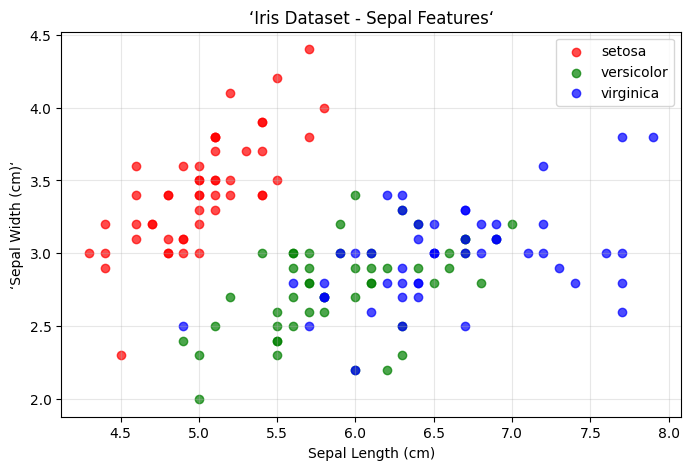

In [4]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
  mask = y == i
  plt.scatter(X[mask, 0], X[mask, 1],
    color=colors[i], label=name, alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("‘Sepal Width (cm)‘")
plt.title("‘Iris Dataset - Sepal Features‘")
plt.legend()
plt.grid(True, alpha=0.3)

## Task : Explore the Data

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

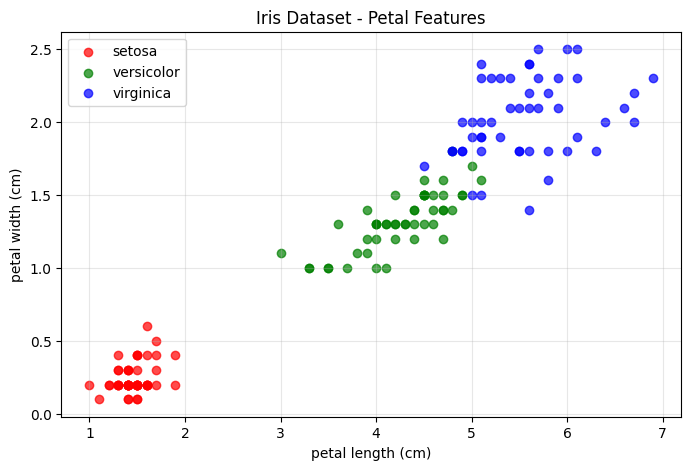

In [6]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
  mask = y == i
  plt.scatter(X[mask, 2], X[mask, 3],
    color=colors[i], label=name, alpha=0.7)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Iris Dataset - Petal Features")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Part 3: Splitting Data (Train/Test)

In [7]:
from sklearn.model_selection import train_test_split
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2, # 20% for testing
random_state=42, # For reproducibility
stratify=y # Keep class proportions balanced
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 120 samples
Testing set: 30 samples


## Task: Verify the Split

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [10]:
#################
# This cell is to perform another train/test split without stratification to observe the changes.
#################


from sklearn.model_selection import train_test_split

print("\n--- Splitting data WITHOUT stratification ---")
X_train_no_stratify, X_test_no_stratify, y_train_no_stratify, y_test_no_stratify = train_test_split(
    X, y,
    test_size=0.2, # 20% for testing
    random_state=42 # For reproducibility
)



--- Splitting data WITHOUT stratification ---


In [11]:
print("\n---------Data for Stratified--------------------------")
print("\nClass distribution in y_train (Original - Stratified):")
display(np.unique(y_train, return_counts=True))

print("Class distribution in y_test (Original - Stratified):")
display(np.unique(y_test, return_counts=True))

print("\n---------Data for NOT Stratified----------------------")

print("\nClass distribution in y_train (Without Stratify):")
display(np.unique(y_train_no_stratify, return_counts=True))

print("Class distribution in y_test (Without Stratify):")
display(np.unique(y_test_no_stratify, return_counts=True))



---------Data for Stratified--------------------------

Class distribution in y_train (Original - Stratified):


(array([0, 1, 2]), array([40, 40, 40]))

Class distribution in y_test (Original - Stratified):


(array([0, 1, 2]), array([10, 10, 10]))


---------Data for NOT Stratified----------------------

Class distribution in y_train (Without Stratify):


(array([0, 1, 2]), array([40, 41, 39]))

Class distribution in y_test (Without Stratify):


(array([0, 1, 2]), array([10,  9, 11]))

**Observations**: Stratified split keeps class proportions consistent across train/test sets but without it the split varies resulting in uneven proportions

# Part 4: Training Your First Model

## Model A: Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Step 1: Create
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train/fit
dt_model.fit(X_train, y_train)

# Step 3: Predict
dt_predictions = dt_model.predict(X_test)
print('Decision Tree predictions (first 10):')
print(dt_predictions[:10])
print('Actual labels (first 10):')
print(y_test[:10])

Decision Tree predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


## Model B: K-Nearest Neighbors (KNN)

In [13]:
# WITH K=5 NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train/FIT
knn_model.fit(X_train, y_train)

# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

print('Actual labels (first 10):')
print(y_test[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


In [14]:
# WITH K=3 NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=3 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Step 2: Train/FIT
knn_model.fit(X_train, y_train)

# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

print('Actual labels (first 10):')
print(y_test[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


## Task 3:  Train the Models
* **Run both code blocks and compare the first 10 predictions. Are they different?**

  They had the same results. Both models matched the actual datas first 10 values exactly.

* **Try changing n neighbors to 3 and then to 10. Does the output change?**
  
  The output t=remained the same for both KNN models even after changing the value of K.

# Part 5: Evaluating Model Performance

* Accuracy Score ; The simplest metric

In [15]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


* Classification Report ; A more detailed view showing precision, recall, and F1-score per class.

In [16]:
from sklearn.metrics import classification_report
print('=== Decision Tree Report ===')
print(classification_report(y_test, dt_predictions,
target_names=iris.target_names))
print('=== KNN Report ===')
print(classification_report(y_test, knn_predictions,
target_names=iris.target_names))

=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



* Confusion Matrix (Visual)

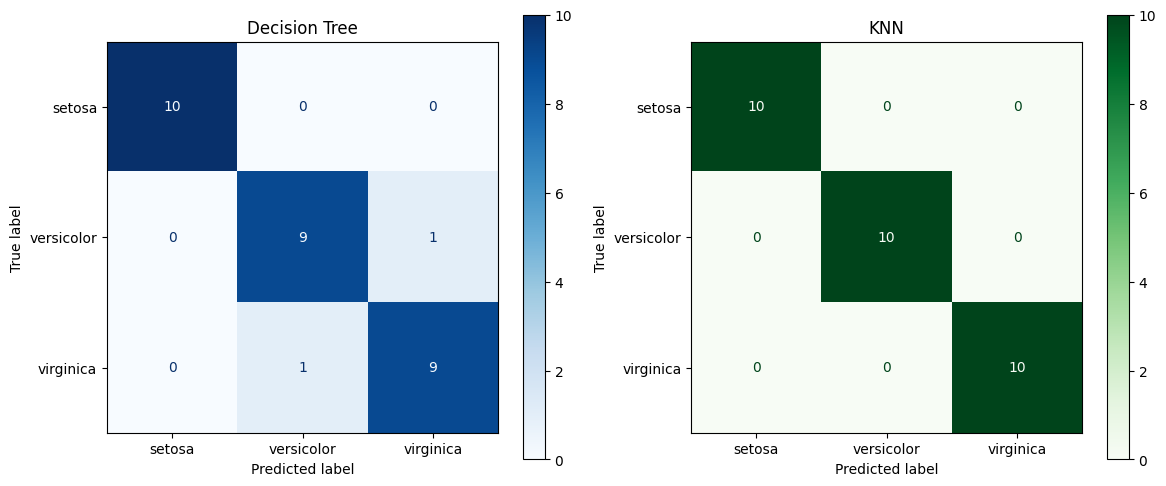

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names)\
  .plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree')
# KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names)\
  .plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN')
plt.tight_layout()
plt.show()

## Task 4: Compare the Models

* Which model achieved higher accuracy?

  *KNN* achieved a 100% accuracy.


* Look at the confusion matrices – which class was hardest to classify? Why?
  
  *Versicolor* had the only errors in the decision tree.

* Which metric (precision or recall) would be more important in a medical diagnosis
scenario? Explain briefly.

  *Recall* is the best choice because it reduces false negatives unlike precision which reduces false positives which is less harmful.



#  Part 6: Predicting New Samples

In [18]:
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower0 = np.array([[5.1, 3.5, 1.4, 0.2]])
# Predict with both models
dt_pred = dt_model.predict(new_flower0)
knn_pred = knn_model.predict(new_flower0)

print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says: setosa
KNN says: setosa


In [19]:
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flowerA = np.array([[6.7, 3.0, 5.2, 2.3]])
# Predict with both models
dt_pred = dt_model.predict(new_flowerA)
knn_pred = knn_model.predict(new_flowerA)

print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says: virginica
KNN says: virginica


In [20]:
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flowerB = np.array([[5.8, 2.7, 4.1, 1.0]])
# Predict with both models
dt_pred = dt_model.predict(new_flowerB)
knn_pred = knn_model.predict(new_flowerB)

print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says: versicolor
KNN says: versicolor


In [21]:
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flowerC = np.array([[4.9, 3.1, 1.5, 0.1]])
# Predict with both models
dt_pred = dt_model.predict(new_flowerC)
knn_pred = knn_model.predict(new_flowerC)

print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says: setosa
KNN says: setosa


Do both models agree on all three? If not, which one do you trust more and why?

Yes, all three models agree on the predictions based on the information for each flower. I rust the results of the KNN as it is the one thata chieved 100% for accuracy,recall and f1-score

# Part 7: Working with Your Own CSV Data

In [22]:
# Create a simple student performance dataset
np.random.seed(42)
n = 100
data = {
'study_hours': np.round(np.random.uniform(1, 10, n), 1),
'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
'assignments': np.random.randint(3, 10, n),
'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}
df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print('CSV saved! First 5 rows:')
print(df.head())

CSV saved! First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [23]:
# Read the CSV file
df = pd.read_csv('students.csv')
# Quick exploration
print(f'Shape: {df.shape}')
print(f'\nColumn types:\n{df.dtypes}')
print(f'\nBasic stats:\n{df.describe()}')
print(f'\nNull Value Check:\n{df.isnull().sum()}')

Shape: (100, 4)

Column types:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000

Null Value Check:
study_hours       0
attendance_pct    0
assignments       0
passed            0
dtype: int64


In [24]:
# Features = all columns except ‘passed‘
X = df[['study_hours', 'attendance_pct', 'assignments']].values
# Target = the ‘passed‘ column
y = df['passed'].values
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Class counts: {np.unique(y, return_counts=True)}')

Features shape: (100, 3)
Target shape: (100,)
Class counts: (array([0, 1]), array([31, 69]))


In [25]:
# Aplly Dataset to Decision Tree Classifier

# Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict & Evaluate
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')
print(classification_report(y_test, predictions,
target_names=['Failed', 'Passed']))

Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



In [27]:
# KNN

# Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# Train/FIT
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict & Evaluate
knn_predictions = knn_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, knn_predictions):.2%}')
print(classification_report(y_test, knn_predictions,
target_names=['Failed', 'Passed']))

Accuracy: 60.00%
              precision    recall  f1-score   support

      Failed       0.33      0.33      0.33         6
      Passed       0.71      0.71      0.71        14

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20



In [31]:
import numpy as np

# Add new column
np.random.seed(42)
df['quiz_score'] = np.random.randint(50,100,len(df))

print(df.head())

   study_hours  attendance_pct  assignments  passed  quiz_score
0          4.4            41.9            6       0          88
1          9.6            78.2            5       1          78
2          7.6            58.9            3       1          64
3          6.4            70.5            6       1          92
4          2.4            94.5            8       1          57


In [33]:
# defining the new features
X_new = df[['study_hours','attendance_pct',
            'assignments','quiz_score']].values
y_new = df['passed'].values

# Split data
X_train,X_test,y_train,y_test = train_test_split(
    X_new,y_new,
    test_size=0.2,
    random_state=42,
    stratify=y_new)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test,dt_predictions))


# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
knn_predictions = knn_model.predict(X_test)

print("KNN Accuracy:",
      accuracy_score(y_test,knn_predictions))

Decision Tree Accuracy: 0.7
KNN Accuracy: 0.65


After adding the quiz scores it improved the accuracy for both models.